In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns


ANNOT_CSV_FILE = '/home/ykinoshita/humrec_mood_tagger/mood_tagger_master_thesis_V2/data/GEMS-INN_2023-01-30_expert.csv'


GEMS_9 = ['Wonder', 'Transcendence', 'Nostalgia', 'Tenderness', 'Peacfulness', 'Joy', 'Power', 'Tension', 'Sadness']
NUM_CLASSES = len(GEMS_9)
GENRE_MAP = {'H': 'Hip-Hop', 'K': 'Classical', 'P': 'Pop'}

emma_df = pd.read_csv(ANNOT_CSV_FILE, encoding="ISO-8859-1")
emma_df.dropna(inplace=True)

In [13]:
emma_df

,Unnamed: 0,artist,title,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness,Sublimity,Vitality,Unease,ICC,Familiarity,Liking
0,1,Trailerpark,Schlechter Tag,15.65,19.68,3.54,5.30,5.08,22.33,2.35,11.20,0.00,18.50,21.15,10.50,0.65,2.00,3.17
1,2,Desiigner,Panda,24.69,4.69,0.78,9.30,7.92,28.26,22.73,9.33,1.06,19.39,30.32,8.91,0.76,4.25,3.83
2,3,NAS,Doo Rags,24.43,18.57,14.29,19.88,17.55,24.67,27.48,0.00,2.50,33.45,36.15,2.11,0.58,2.08,4.00
3,4,DMX,X Gon' Give It To Ya,17.27,7.05,9.89,8.60,9.52,37.27,37.77,0.00,0.73,26.05,40.19,0.61,0.86,3.91,4.18
4,5,Xatar,Meine Große Liebe,6.46,15.86,0.00,9.27,0.67,13.86,15.98,3.79,0.00,19.42,19.77,3.38,0.52,2.00,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,Oasis,Don't Look Back In Anger,10.31,7.60,31.85,14.10,15.00,18.47,3.99,6.56,10.03,26.27,17.74,11.55,0.84,3.89,3.44
367,368,Der Junge mit der Gitarre,Hallo Worum Gehts Ich Bin Dagegen,11.20,8.11,0.00,0.00,4.20,27.52,15.02,8.74,1.33,13.45,30.34,9.19,0.89,1.28,2.31
368,369,Chris Brown,Forever,17.44,1.79,10.14,10.42,5.66,26.20,11.26,9.63,0.00,22.56,24.38,8.71,0.81,2.48,2.86
369,370,Ryan Adams,Lucky Now,14.44,9.07,13.75,17.13,30.12,16.12,4.26,9.06,3.42,29.92,15.01,11.20,0.79,1.28,2.72


In [14]:
from KDEpy import FFTKDE

In [15]:
y = np.array(emma_df['Peacfulness'])
y

array([ 5.08,  7.92, 17.55,  9.52,  0.67, 17.32,  8.91,  8.44,  5.87,
        7.13, 11.32,  8.79, 11.66, 19.78, 17.59,  6.83, 20.32,  7.3 ,
        4.34, 10.01, 17.55,  1.67,  3.91, 11.39,  7.08,  2.5 , 14.37,
       10.48,  8.46,  7.93,  4.96, 17.81, 10.52,  6.7 ,  2.81,  8.67,
        8.72, 10.3 , 27.33,  6.88,  3.96,  5.08,  1.95, 13.22,  7.96,
        2.75,  2.79, 16.95,  2.98, 14.53,  7.22, 11.44, 13.6 ,  1.24,
        4.45, 19.81,  2.79,  5.3 ,  9.66,  2.43,  2.15,  7.06, 12.27,
        3.42,  9.7 ,  7.31, 11.91,  6.22,  6.04, 13.7 ,  7.83,  7.5 ,
        4.71,  2.31,  2.78,  0.  ,  5.89, 16.63,  4.5 ,  5.69,  5.16,
        3.96, 13.96,  4.14,  2.88,  0.26,  7.05,  5.27,  1.38,  1.56,
       28.13, 12.21, 19.11,  2.4 , 18.98, 13.02, 11.28,  3.11, 10.01,
        5.23, 14.59,  3.4 ,  7.4 , 40.42, 38.31, 42.1 ,  2.56,  5.62,
        6.07, 17.83, 18.8 , 38.46, 44.77, 19.45, 16.07, 27.09, 14.57,
        8.87, 39.04, 37.97, 14.36, 36.66, 11.91, 42.24, 23.78, 24.85,
       26.17,  7.65,

In [16]:
silverman_bandwidth = 1.06 * np.std(y) * np.power(len(y), (-1.0 / 5.0))
print(silverman_bandwidth)

3.308072582374425


In [17]:
kernel = FFTKDE(bw=silverman_bandwidth).fit(y, weights=None)

In [18]:
x, y_dens_grid = kernel.evaluate(4096)  # Default precision is 1024
y_dens_grid

array([5.86693985e-07, 8.26514777e-07, 8.43448487e-07, ...,
       2.81149496e-07, 2.75504926e-07, 1.95564662e-07])

In [19]:
from sklearn.preprocessing import MinMaxScaler
y_dens_grid = (
            MinMaxScaler().fit_transform(y_dens_grid.reshape(-1, 1)).flatten()
        )

In [20]:
y_dens_grid.shape

(4096,)

In [21]:

plt.plot(y_dens_grid)

NameError: name 'plt' is not defined

In [32]:
from typing import Any, Sequence


def bisection(array: Sequence[Any], value: Any) -> int:
    """Given an ``array`` , and given a ``value`` , returns an index j such that ``value`` is between array[j]
    and array[j+1]. ``array`` must be monotonic increasing. j=-1 or j=len(array) is returned
    to indicate that ``value`` is out of range below and above respectively.
    From https://stackoverflow.com/a/41856629"""
    n = len(array)
    if value < array[0]:
        return -1
    elif value > array[n - 1]:
        return n
    jl = 0  # Initialize lower
    ju = n - 1  # and upper limits.
    while ju - jl > 1:  # If we are not yet done,
        jm = (ju + jl) >> 1  # compute a midpoint with a bitshift
        if value >= array[jm]:
            jl = jm  # and replace either the lower limit
        else:
            ju = jm  # or the upper limit, as appropriate.
        # Repeat until the test condition is satisfied.
    if value == array[0]:  # edge cases at bottom
        return 0
    elif value == array[n - 1]:  # and top
        return n - 1
    else:
        return jl

In [ ]:
try:
    idx = bisection(x, y)
except AttributeError:
    raise ValueError("Must call fit first!")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
 try:
            dens = self.y_dens_grid[idx]
        except IndexError:
            if idx <= -1:
                idx = 0
            elif idx >= len(self.x):
                idx = len(self.x) - 1
            dens = self.y_dens_grid[idx]
        return dens

In [ ]:
x

array([-12.46243787, -12.44459052, -12.42674318, ...,  60.58674318,
        60.60459052,  60.62243787])

AttributeError: 'numpy.ndarray' object has no attribute 'pdf'

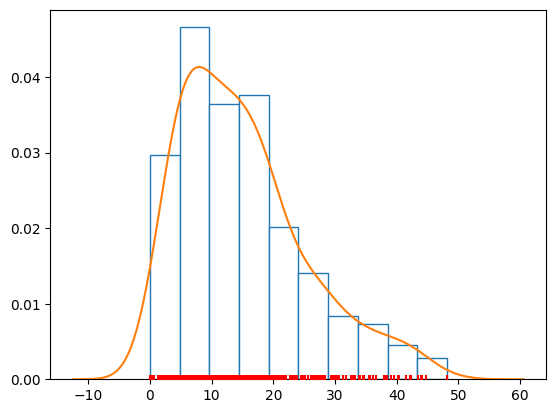

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y_dens_grid, zorder=10, color='#ff7f0e', label='KDE with box kernel')
plt.scatter(y, np.zeros_like(y), marker='|', c='r',
            label='Data', zorder=9)
plt.hist(y, density=True, label='Histogram', edgecolor='#1f77b4', color='w')
plt.plot(x, y.pdf(x), label='True pdf', c='r', ls='--')
plt.legend(loc='best')

In [ ]:
from denseweight import DenseWeight
dw = DenseWeight(alpha=2)

dw.fit(y)


array([1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.35407762e+00, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 3.61331144e+00, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
       1.01290434e-05, 1.01290434e-05, 1.01290434e-05, 1.01290434e-05,
      

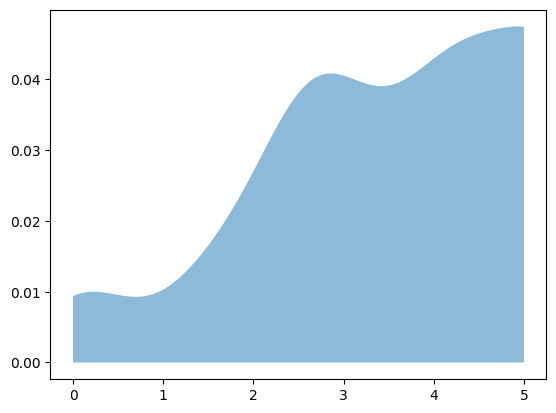

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Sample data (replace this with your own dataset)
data = y.reshape(-1, 1)

# Create and fit a Kernel Density Estimation model
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(data)

# Generate points for the KDE estimation
x = np.linspace(0, 5, 1000)
log_dens = kde.score_samples(x.reshape(-1, 1))

# Plot the KDE estimation
plt.fill_between(x, np.exp(log_dens), alpha=0.5)
plt.show()

In [ ]:
log_density = kde.score_samples(y.reshape(-1, 1))

In [ ]:
probability = np.exp(log_density)

In [ ]:
probability.sort()

In [ ]:
probability

12.454685810734087

In [ ]:
kernel(y)

ValueError: The grid must be sorted.

In [22]:
def GDE_fit( train_embeds, save_path = None):
        GDE = KernelDensity().fit(train_embeds)
        if save_path:
            filename = os.path.join(save_path, 'GDE.sav')
            pickle.dump(GDE, open(filename, 'wb'))
        return GDE

In [23]:
def GDE_scores(embeds, GDE ):
        scores = GDE.score_samples(embeds)
        norm = np.linalg.norm(-scores)
        return -scores/norm

In [24]:
gde = GDE_fit(y.reshape(-1, 1))

NameError: name 'KernelDensity' is not defined

In [25]:
GDE_scores(y.reshape(-1, 1), gde)

NameError: name 'gde' is not defined

In [26]:
from typing import Optional, Union
from numpy.typing import ArrayLike
import functools
class GetKDE:
    r"""
    This is badsed on the code from denseweight.
    But instead it only returns the dense probabilities

    """

    def __init__(
        self,
        alpha: float = 1.0,
        bandwidth: Optional[Union[float, str]] = None,
        eps: float = 1e-6,
    ):
        self.alpha = alpha
        self.bandwidth = bandwidth
        self.eps = eps

    def fit(self, y: ArrayLike, grid_points=4096) -> np.ndarray:

        if self.bandwidth is None:
            silverman_bandwidth = 1.06 * np.std(y) * np.power(len(y), (-1.0 / 5.0))
            self.bandwidth = silverman_bandwidth

        self.kernel = FFTKDE(bw=self.bandwidth).fit(y, weights=None)

        x, y_dens_grid = self.kernel.evaluate(grid_points)  # Default precision is 1024
        self.x = x

        # Min-Max Scale to 0-1 since pdf's can actually exceed 1
        # See: https://stats.stackexchange.com/questions/5819/kernel-density-estimate-takes-values-larger-than-1
        self.y_dens_grid = (
            MinMaxScaler().fit_transform(y_dens_grid.reshape(-1, 1)).flatten()
        )

        self.y_dens = np.vectorize(self.get_density)(y)
        return self.y_dens #self.weights

    def get_density(self, y: ArrayLike) -> np.ndarray:
        try:
            idx = bisection(self.x, y)
        except AttributeError:
            raise ValueError("Must call fit first!")
        try:
            dens = self.y_dens_grid[idx]
        except IndexError:
            if idx <= -1:
                idx = 0
            elif idx >= len(self.x):
                idx = len(self.x) - 1
            dens = self.y_dens_grid[idx]
        return dens



In [27]:
gdw = GetKDE()

In [33]:
dense = gdw.fit(y)

In [34]:
max_index = np.argmax(dense)

In [35]:
dense[max_index]

0.9999897762127931

In [36]:
y[max_index]

7.96

In [37]:
y.mean()

15.062567567567566

In [38]:
top_indices = np.argsort(dense)[:5]

In [78]:
np.argsort(dense)

array([132, 112, 183, 142, 149, 123, 177, 105, 195, 103, 175, 214, 118,
       111, 104, 140, 119, 121, 143, 213, 174, 211, 145, 232, 181, 135,
       360, 229, 295, 257, 253, 308, 150, 228, 368, 180, 245, 217, 198,
       192, 190, 206,  90, 240, 200, 285, 255, 361,  38, 115, 167, 289,
       335, 237, 233, 152, 332, 126, 205, 182,  75, 356,  85, 129, 265,
       125, 204, 144, 168, 264,   4, 189, 124, 345, 276, 184, 249, 306,
       225, 364, 288,  53,  88, 155, 196,  89, 163, 269,  21, 294, 250,
       133, 171,  42, 351, 307, 244, 215, 130, 164, 158,  60, 331, 277,
       221, 188,  16,  73, 172,  93, 201,  59, 344,  25, 321, 336,  55,
        13, 106, 113,  45,  46,  56,  74, 220, 235,  34, 300,  84,  92,
       311, 248,  94, 347,  48, 243, 110, 320, 216, 137,  97, 223, 348,
       191, 310, 101, 278,  63, 352, 131, 315, 109,  31, 290, 230, 298,
       357,  14, 330,   2,  20, 281, 284, 318,   5, 323, 369,  22, 359,
       314,  47, 301, 197,  81,  40, 358, 274, 327, 161,  77, 23

In [39]:
top_indices

array([132, 112, 183, 142, 149])

In [40]:
y[top_indices]

array([48.16, 44.77, 44.04, 43.98, 43.46])

In [41]:
y[np.argsort(dense)]

array([48.16, 44.77, 44.04, 43.98, 43.46, 42.24, 42.22, 42.1 , 41.46,
       40.42, 40.18, 39.56, 39.04, 38.46, 38.31, 38.24, 37.97, 36.66,
       36.24, 35.69, 35.44, 34.74, 34.68, 34.47, 34.07, 33.82, 33.2 ,
       33.12, 32.88, 32.59, 31.72, 31.36, 30.57, 30.39, 30.12, 30.05,
       29.92, 29.82, 29.7 , 29.51, 29.31, 28.37, 28.13, 27.84, 27.84,
       27.64, 27.6 , 27.36, 27.33, 27.09, 27.02, 26.85, 26.68, 26.65,
       26.52, 26.46, 26.23, 26.17,  0.  ,  0.  ,  0.  , 25.56,  0.26,
       25.06, 25.07, 24.85, 24.58, 24.51, 24.47, 24.42,  0.67, 23.86,
       23.78, 23.54, 23.22, 23.2 , 23.03, 22.88, 22.89, 22.82, 22.78,
        1.24,  1.38, 22.03, 21.83,  1.56, 21.58, 21.59,  1.67, 21.45,
       21.24,  1.82, 21.18,  1.95, 20.92, 20.88, 20.89, 20.85, 20.77,
       20.73, 20.58,  2.15, 20.45, 20.43, 20.4 ,  2.25, 20.32,  2.31,
       20.19,  2.4 ,  2.44,  2.43, 19.96,  2.5 , 19.87, 19.85, 19.81,
       19.78,  2.56, 19.45,  2.75,  2.79,  2.79,  2.78,  2.78, 19.3 ,
        2.81, 19.18,

In [42]:
dense[np.argsort(dense)]

array([0.03016626, 0.07388881, 0.08438222, 0.08513681, 0.09229017,
       0.10759573, 0.10800721, 0.10923454, 0.11613564, 0.12574014,
       0.1278298 , 0.13275606, 0.13660825, 0.14074904, 0.14190227,
       0.14241552, 0.144356  , 0.15439227, 0.15804679, 0.1629553 ,
       0.16541705, 0.17307543, 0.17368901, 0.17621164, 0.18110341,
       0.18442811, 0.19345637, 0.19455286, 0.19852021, 0.20326956,
       0.21925256, 0.22639839, 0.24317268, 0.24717318, 0.25368426,
       0.2549201 , 0.25825736, 0.26034337, 0.2632728 , 0.26791384,
       0.27260601, 0.29566817, 0.3014079 , 0.30851979, 0.30851979,
       0.31389647, 0.31479643, 0.32072357, 0.3216361 , 0.32763574,
       0.32950734, 0.33422476, 0.33852961, 0.33949121, 0.34287696,
       0.34483506, 0.35132267, 0.35285066, 0.35659764, 0.35659764,
       0.35659764, 0.37097903, 0.38492954, 0.38730644, 0.38730644,
       0.39478388, 0.40458208, 0.40727792, 0.40863787, 0.41070857,
       0.43315866, 0.43332562, 0.43720269, 0.44761793, 0.46273

In [56]:
(dense>0.5).sum()

289

In [57]:
(dense<0.5).sum()

81

In [58]:
l = dense<0.5

In [79]:
import random

random.choices(y[l],weights = 1-dense[l])

[34.68]

In [63]:
y[l]

array([ 0.67, 27.33,  0.  ,  0.26, 28.13, 40.42, 38.31, 42.1 , 38.46,
       44.77, 27.09, 39.04, 37.97, 36.66, 42.24, 23.78, 24.85, 26.17,
       25.06, 48.16, 33.82, 38.24, 43.98, 36.24, 24.51, 34.68, 43.46,
       30.57, 26.46, 27.02, 24.47, 35.44, 40.18, 42.22, 30.05, 34.07,
        0.  , 44.04, 23.2 , 23.86, 29.31, 29.51, 41.46, 29.7 , 27.84,
       24.58,  0.  , 28.37, 34.74, 35.69, 39.56, 29.82, 22.89, 30.39,
       33.12, 34.47, 26.52, 26.65, 27.84, 29.92, 23.03, 31.72, 27.6 ,
       32.59, 24.42, 25.07, 23.22, 27.64, 22.78, 26.85, 32.88, 22.88,
       31.36, 26.23, 26.68, 23.54, 25.56, 33.2 , 27.36, 22.82, 30.12])

In [81]:
y.index(random.choices(y[l],weights = 1-dense[l])[0])

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [84]:
np.where(y == random.choices(y[l],weights = 1-dense[l]))[0][0]

200